In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
print("Pandas version used: " + pd.__version__)
print("Matplotlib version used: " + plt.matplotlib.__version__)
print("Seaborn version used: " + sns.__version__)

Pandas version used: 1.0.5
Matplotlib version used: 3.2.2
Seaborn version used: 0.10.1


In [3]:
# Read the insurance data downloaded from
# https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv
ins_data = pd.read_csv("insurance.csv")

In [4]:
# Check the shape of the dataframe
ins_data.shape

(1338, 7)

In [5]:
# Check the first few rows of the data to get an idea for how best to prepare the data
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# See if there are any null values that need to be dealt with:
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Charges will obviously be the target variable.



It seems unlikely to me that the number of children will be a useful feature, but it might be interesting to check it anyway. Region could be useful, so let's visualize both before deciding what to do with them:

Text(0.5, 1.0, 'Region vs. Charges Boxplot')

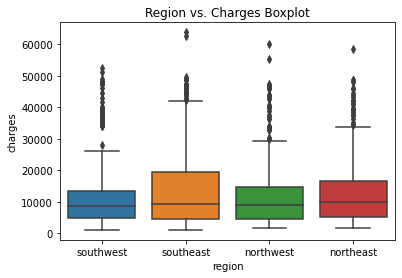

In [8]:
sns.boxplot(x='region', y='charges', data=ins_data)
plt.title("Region vs. Charges Boxplot")

It doesn't seem like region is a terribly useful feature. For now, let's drop it for simplicity's sake.

In [7]:
ins_data.drop('region', axis=1, inplace=True)

Text(0.5, 1.0, 'Children vs. Charges Boxplot')

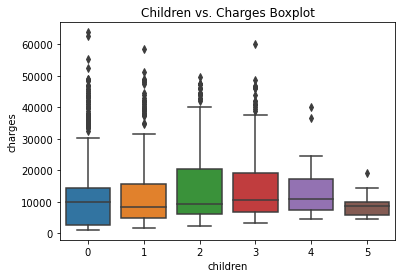

In [9]:
sns.boxplot(x='children', y='charges', data=ins_data)
plt.title("Children vs. Charges Boxplot")

Number of children doesn't seem like a great feature either, but let's explore it more later.

Text(0.5, 1.0, 'Smoker vs. Charges Boxplot')

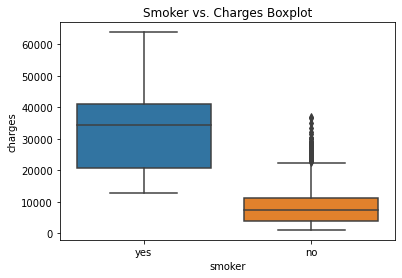

In [10]:
sns.boxplot(x='smoker', y='charges', data=ins_data)
plt.title("Smoker vs. Charges Boxplot")

Smoker is definitely a feature worth keeping. It seems to make a significant difference and might be a useful feature.

Text(0.5, 1.0, 'Sex vs. Charges Boxplot')

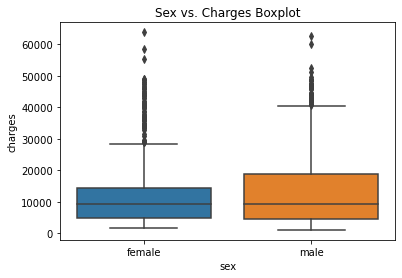

In [11]:
sns.boxplot(x='sex', y='charges', data=ins_data)
plt.title("Sex vs. Charges Boxplot")

Sex doesn't seem to make much of a difference, but we will keep it for now to explore more later.

BMI and Age can stay as they are, but sex, and smoker will need to be changed into dummy variables.

In [11]:
# Convert the categorial variables into dummy ones
ins_data = pd.get_dummies(ins_data)
ins_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0


In [12]:
# Drop the extra dummy variables. Leaving all of the regions for now just for simplicity's sake, even though we could drop one
ins_data.drop(['sex_male','smoker_no'],axis=1,inplace=True)

In [13]:
ins_data.head()

,age,bmi,children,charges,sex_female,smoker_yes
0,19,27.900,0,16884.92400,1,1
1,18,33.770,1,1725.55230,0,0
2,28,33.000,3,4449.46200,0,0
3,33,22.705,0,21984.47061,0,0
4,32,28.880,0,3866.85520,0,0


In [14]:
# Let's round the charges and bmi variable up to 2 decimals for simplicity.
# No useful data should be lost and it will be easier to read:
ins_data = ins_data.round(decimals=2)

In [15]:
ins_data

,age,bmi,children,charges,sex_female,smoker_yes
0,19,27.90,0,16884.92,1,1
1,18,33.77,1,1725.55,0,0
2,28,33.00,3,4449.46,0,0
3,33,22.70,0,21984.47,0,0
4,32,28.88,0,3866.86,0,0
...,...,...,...,...,...,...
1333,50,30.97,3,10600.55,0,0
1334,18,31.92,0,2205.98,1,0
1335,18,36.85,0,1629.83,1,0
1336,21,25.80,0,2007.94,1,0


I think this data is now ready to be used for some EDA!

In [16]:
ins_data.to_csv("ins_data_clean.csv")